# IMDB data from 2006 to 2016


Датасет представляет информацию о 1000 популярных фильмах в базе данных IMDB за последние 10 лет

**Тема**: исследование зависимости оценок фильмов с 2006 по 2016 год по данным imdb от качественных и количественных характеристик: жанра, актеров, продолжительности, дохода фильма, голосов зрителей и оценки критиков.

**Исследовательская задача** : установить зависимость оценки пользователями фильма от жанра, актеров, продолжительности, дохода фильма, голосов зрителей и оценки критиков.

## Переменные
1. Rank  - порядок рейтинга фильмов - количественная непрерывная
2. Title - название фильма - текстовые данные
3. Genre - жанр фильма - текстовые данные
4. Description - описание фильма - текстовые данные
5. Director - режиссер - текстовые данные
6. Actors - актеры - текстовые данные
7. Year - год - количественная дискретная (с 2006 по 2016)
8. Runtime (Minutes) - продолжительность фильма - количественная непрерывная
9. Rating - оценка зрителей  - от 0 до 10 - количественная непрерывная
10. Votes - голоса зрителей - количественная непрерывная
11. Revenue (Millions) - доход фильма - количественная непрерывная
12. Metascore - оценка критиков - от 0 до 100 - количественная непрерывная

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('IMDB-Movie-Data.csv')
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


# Этап 2

## Фильтрация

*Предположим, что хорошие оценки зрителей принимают значение 7 и выше*


In [ ]:
data[data['Rating'] >= 7].shape[0]

445

Фильмы с высокими оценками составляют 44,5% из общего количества представленных в датасете фильмов

**Вопрос 1. Рассмотрим, как жанр(на примере драм) может влиять на оценку зрителей.**

In [ ]:
data[data['Genre'].str.contains('Drama') == True].shape[0]

513

51.3% фильмов, попавших в данные, являются драмами.

In [ ]:
data[(data['Genre'].str.contains('Drama') == True)
     &(data['Rating'] >= 7)].shape[0]

286

28,6% драм получили высокие оценки зрителей, это больше половины количества самих драм. Можно говорить о том, что драмы в целом нравятся зрителям, а значит, жанр тоже может влиять на оценку. Мы рассмотрели пример с драмами, чтобы предположить зависимость.

**Вопрос 2. Что говорит доход об оценке зрителей? Чтобы ответить на этот вопрос, рассмотрим распределение переменной дохода.**

<AxesSubplot:>

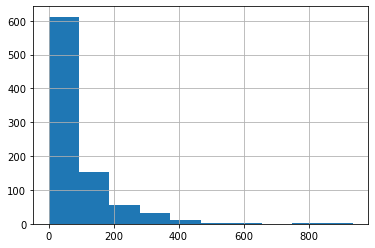

In [ ]:
data['Revenue (Millions)'].hist()

Мы видим, что в нашем датасете, в основном, много фильмов с доходом от 0 до 100 миллионов. Посмотрим, какие оценки зрители ставят фильму с доходом 100 миллионов и меньше?  

In [ ]:
data[data['Revenue (Millions)'] <= 100].shape[0]

622

Фильмы с доходом менее 100 миллионов составляют 62,2% от общего количества (622 фильма)

In [ ]:
data[(data['Revenue (Millions)'] < 100)
     &(data['Rating'] < 7)].shape[0]

356

356 фильмов (это больше 50% от количества фильмов с доходом менее 100 миллионов, всего их 622) получили невысокие оценки от зрителей.

Доход фильма, скорее всего, взаимосвязан с оценкой зрителей, но не влияет на нее. Мы в дальнейшем еще поработаем с этими переменными.

**Вопрос 3. Может ли известный актер, исполняющий роль в подходящем для себя амплуа (или в жанре, знакомом зрителю) повлиять на хорошие оценки от зрителей? (В наших данных в переменной Актеры записаны только главные роли)**

Возьмем актёра Роберта Дауни Младшего и жанр фильмов Action (так как он получил популярность, играя роль Тони Старка в киновселенной Марвел).

In [ ]:
data[data['Genre'].str.contains('Action') == True].shape[0]

303

В жанре Action у нас 303 фильмов, что составляет 30,3% из общего количества.

Рассмотрим, какая средняя оценка зрителей у фильмов в этом жанре?

In [ ]:
data[data['Genre'].str.contains('Action') == True]['Rating'].mean()

6.614521452145213

Фильмам в в жанре Action ставят хорошие оценки, среднее равно 6.6

Посмотрим, как изменится средняя оценка зрителей, если отобрать только те фильмы в жанре Action, в которых играет Роберт Дануни Младший.

In [ ]:
data[(data['Actors'].str.contains('Robert Downey Jr') == True)
     &(data['Genre'].str.contains('Action') == True)]['Rating'].mean()

7.51111111111111

Фильмам в в жанре Action, в которых играет Роберт Дауни Мл. ставят в среднем высокие оценки, среднее равно 7.5. Наше предположение о роли актера в какой-то степени подтвердилось. Получается, что известный актёр, играющий в знакомом для зрителе жанре, может повлиять на оценку.

**Вопрос 4: Как зрители оценивают фильмы, у которых большая продолжительность или слишком маленькая? Ведь слишком долгий фильм может надоесть зрителю, а слишком короткий - быть непонятным и "скомканным". В среднем фильмы массовой культуры имеют продолжительность от 90 до 120 минут. Возьмем этот интервал как комфортную длину фильма.**

In [ ]:
data[(data['Runtime (Minutes)'] >= 90)
    &(data['Runtime (Minutes)'] <= 120)].shape[0]

639

63,9% процентов фильмов имеют комфортную продолжительность.

Посмотрим, какая средняя оценка у этих фильмов.

In [ ]:
data[(data['Runtime (Minutes)'] >= 90)
    &(data['Runtime (Minutes)'] <= 120)]['Rating'].mean()

6.606885758998439

В среднем комфортным по продолжительности фильмам ставят достаточно хорошие оценки (средняя оценка 6.6).

Создадим новую переменную, где проранжируем оценку зрителей: от 0 до 5 - низкая оценка, от 5 до 7 - хорошая, от 7 до 10 - высокая.

In [ ]:
def rating_scale(value):
    if value >= 0 and value < 5:
        return 'Низкая оценка'
    elif value >= 5 and value < 7:
        return 'Хорошая оценка'
    elif value >= 7 and value < 10:
        return 'Высокая оценка'

In [ ]:
data['Rating_scale'] = data['Rating'].apply(rating_scale)

Используя проранжированную переменную оценки критиков, рассмотрим, какие в целом оценки ставили "комфортным фильмам"

In [ ]:
data[(data['Runtime (Minutes)'] >= 90)
    &(data['Runtime (Minutes)'] <= 120)]['Rating_scale'].value_counts()

Хорошая оценка    376
Высокая оценка    237
Низкая оценка      26
Name: Rating_scale, dtype: int64

Мы видим, что в целом комфортным фильмам ставят хорошие и высокие оценки, низкие ставились очень редко. Разберем для примера слишком длинные фильмы (больше 120 минут)

In [ ]:
data[data['Runtime (Minutes)'] > 120]['Rating_scale'].value_counts()

Высокая оценка    197
Хорошая оценка     86
Низкая оценка       6
Name: Rating_scale, dtype: int64

Как оказалось, слишком долгим фильмам также ставят высокие оценки. Таких фильмов 289, 68% из которых получили высокие оценки (197 фильмов). При этом комфортных фильмов 639, и только 37% из них получили высокие оценки.

Можно сделать вывод, что продолжительность фильма не так сильно влияет на оценку зрителей. Скорее всего, в совокупности с другими факторами продолжительность фильма будет "действовать" сильнее.

## Сортировка

In [ ]:
data.sort_values(by = 'Revenue (Millions)', ascending = False)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_scale,Runtime_scale
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,Высокая оценка,Слишком длинный
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0,Высокая оценка,Слишком длинный
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0,Высокая оценка,Слишком длинный
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,Высокая оценка,Слишком длинный
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Высокая оценка,Слишком длинный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,978,Amateur Night,Comedy,Guy Carter is an award-winning graduate studen...,Lisa Addario,"Jason Biggs, Janet Montgomery,Ashley Tisdale, ...",2016,92,5.0,2229,NaN,38.0,Хорошая оценка,Комфортная продолжительность
978,979,It's Only the End of the World,Drama,"Louis (Gaspard Ulliel), a terminally ill write...",Xavier Dolan,"Nathalie Baye, Vincent Cassel, Marion Cotillar...",2016,97,7.0,10658,NaN,48.0,Высокая оценка,Комфортная продолжительность
988,989,Martyrs,Horror,A young woman's quest for revenge against the ...,Pascal Laugier,"Morjana Alaoui, Mylène Jampanoï, Catherine Bég...",2008,99,7.1,63785,NaN,89.0,Высокая оценка,Комфортная продолжительность
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0,Хорошая оценка,Комфортная продолжительность


Самым кассовым фильмом является фильм Star Wars: Episode VII - The Force Awakens. Его доход составил 936.63 миллионов, а зрители поставили ему довольно высокую оценку (8.1).

In [ ]:
data.sort_values(by = 'Rating')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_scale,Runtime_scale
829,830,Disaster Movie,Comedy,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008,87,1.9,77207,14.17,15.0,Низкая оценка,Слишком короткий
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,NaN,NaN,Низкая оценка,Слишком короткий
871,872,Dragonball Evolution,"Action,Adventure,Fantasy",The young warrior Son Goku sets out on a quest...,James Wong,"Justin Chatwin, James Marsters, Yun-Fat Chow, ...",2009,85,2.7,59512,9.35,45.0,Низкая оценка,Слишком короткий
647,648,Tall Men,"Fantasy,Horror,Thriller",A challenged man is stalked by tall phantoms i...,Jonathan Holbrook,"Dan Crisafulli, Kay Whitney, Richard Garcia, P...",2016,133,3.2,173,NaN,57.0,Низкая оценка,Слишком длинный
968,969,Wrecker,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83,3.5,1210,NaN,37.0,Низкая оценка,Слишком короткий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,Высокая оценка,Слишком длинный
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0,Высокая оценка,Комфортная продолжительность
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN,Высокая оценка,Слишком длинный
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,Высокая оценка,Слишком длинный


Самая маленькая оценка зрителей у комедии Disaster Movie. Рейтинг составлят 1.9. При этом видим, что оценка критиков и оценка зрителей совпадают: оба значения низкие (15 и 1.9)

In [ ]:
data[data['Rating'] >= 7].sort_values(by = ['Rating', 'Metascore'], ascending = [True, False])

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_scale,Runtime_scale
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0,Высокая оценка,Комфортная продолжительность
635,636,Knocked Up,"Comedy,Romance","For fun-loving party animal Ben Stone, the las...",Judd Apatow,"Seth Rogen, Katherine Heigl, Paul Rudd, Leslie...",2007,129,7.0,309398,148.73,85.0,Высокая оценка,Слишком длинный
315,316,Snowpiercer,"Action,Drama,Sci-Fi",Set in a future where a failed climate-change ...,Bong Joon Ho,"Chris Evans, Jamie Bell, Tilda Swinton, Ed Harris",2013,126,7.0,199048,4.56,84.0,Высокая оценка,Слишком длинный
278,279,Everybody Wants Some!!,Comedy,"In 1980, a group of college baseball players n...",Richard Linklater,"Blake Jenner, Tyler Hoechlin, Ryan Guzman,Zoey...",2016,117,7.0,36312,3.37,83.0,Высокая оценка,Комфортная продолжительность
799,800,The World's End,"Action,Comedy,Sci-Fi",Five friends who reunite in an attempt to top ...,Edgar Wright,"Simon Pegg, Nick Frost, Martin Freeman, Rosamu...",2013,109,7.0,199813,26.00,81.0,Высокая оценка,Комфортная продолжительность
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,Высокая оценка,Слишком длинный
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0,Высокая оценка,Комфортная продолжительность
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,Высокая оценка,Слишком длинный
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN,Высокая оценка,Слишком длинный


По сортировке можем заметить, что в большинстве случаев рейтинг от зрителей и оценка критиков прямо пропорциональны: если рейтинг высокий, то и оценка критиков тоже. Хотя есть исключения. Например, у фильма The Intouchables высокий рейтинг 8.6, но оценка критиков меньше среднего (57)

##  Создание переменных

Создадим переменную, в которой укажем, что продолжительность фильма комфортная (от 90 до 120 минут), слишком короткий (до 90 минут), слишком длинный (больше 120 минут)

In [ ]:
def runtime_scale(value):
    if value < 90:
        return 'Слишком короткий'
    elif value >= 90 and value <= 120:
        return 'Комфортная продолжительность'
    elif value > 120:
        return 'Слишком длинный'

In [ ]:
data['Runtime_scale'] = data['Runtime (Minutes)'].apply(runtime_scale)

## Частотные таблицы

<AxesSubplot:>

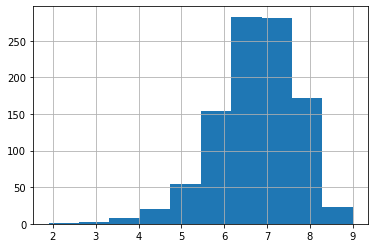

In [ ]:
data['Rating'].hist()

Гистограмма проиллюстрировала, какие значения оценок зрителей есть в датасете и как они распределены, например, больше всего фильмов с рейтингом от 6 до 8, при этом мало фильмов с совсем низким рейтингом (от 1 до 5) и с достаточно высоким (9, значения 10 вообще нет).  

<AxesSubplot:xlabel='Year'>

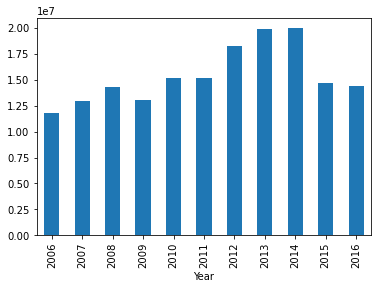

In [ ]:
data.groupby('Year')['Votes'].sum().plot(kind = 'bar')

Столбчатая диаграмма показывает суммарное количество голосов зрителей за фильмы 2006-2016 годов. Больше всего голосов зрителей наблюдается в 2013-2014 годах, возможно, в эти годы фильмов с высокой оценкой будет больше как раз таки засчёт большого количества голосов.  

<AxesSubplot:>

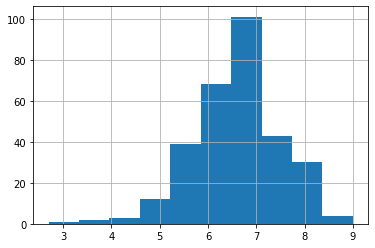

In [ ]:
data[data['Genre'].str.contains('Action') == True]['Rating'].hist()

Action - довольно популярный жанр кино. Гистограмма показала распределение оценок зрителей за фильмы в этом жанре. Интересно, что зрителям в общем такие фильмы нравятся (чаще всего встречаются оценка от 6.5 до 7). Это в очередной раз доказывает, что оценка зрителей зависит в какой-то степени и от жанра фильма.

<AxesSubplot:>

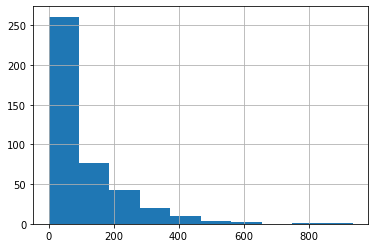

In [ ]:
data[data['Rating'] >= 7]['Revenue (Millions)'].hist()

Вернемся к гипотезе о том, что доход фильма и оценка зрителей взаимосвязаны, построим гистограмму распределения по доходам среди фильмов с высокой оценкой (отфильтрованные данные). График показал, что больше всего фильмов с высокой оценкой получили доход от 0 до примерно 100 миллионов. Мы видим, что доход и оценка зрителей в какой-то степени имеют связь (вспоминаем фильтрацию), а в иных случаях и нет (смотрим на график).

<AxesSubplot:xlabel='Rating_scale'>

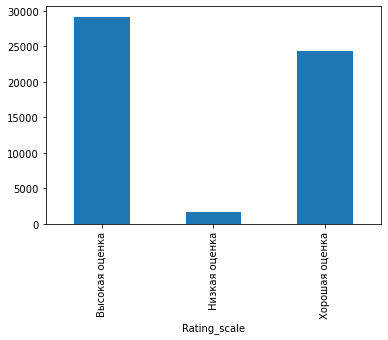

In [ ]:
data.groupby('Rating_scale')['Metascore'].sum().plot(kind = 'bar')

График распределения по оценке зрителей и оценке критиков показал, что в общем, эти показатели совпадают. Например, когда зрителями ставилась высокая оценка, она ставилась и критиками(сумма оценки большая), аналогично и с низкими оценками. Мы решили сделать именно с суммой оценок критиков, так как данные у нас большие.

##  МЦТ и описательные статистики

Рассмотрим переменные, вокруг которых мы раннее строили гипотезы: продолжительность, доход, оценка от критиков и соответственно оценка зрителей, как основная переменная в нашем датасете.

### Продолжительность фильма

Непрерывная переменная, можем использовать все три мцт.

In [ ]:
data['Runtime (Minutes)'].mean()

113.172

Средняя продолжительность фильмов - 113 минут с округлением.

In [ ]:
data['Runtime (Minutes)'].median()

111.0

50% фильмов имеют продолжительность более 111 минут.

In [ ]:
data['Runtime (Minutes)'].mode()

0    108
dtype: int64

Чаще всего в данных встречаются фильмы продолжительностью в 108 минут.

<AxesSubplot:>

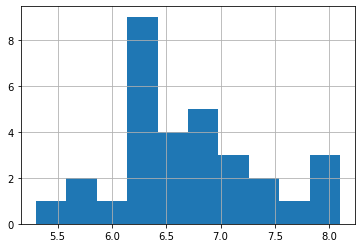

In [ ]:
data[data['Runtime (Minutes)'] == data['Runtime (Minutes)'].mode()[0]]['Rating'].hist()

У фильмов с часто встречающейся в данных продолжительностью хорошие оценки (от 6 до 7), есть и высокие оценки.

In [ ]:
data['Runtime (Minutes)'].max()

191

Максимальная продолжительность фильма составляет 191 минуту.

In [ ]:
data[data['Runtime (Minutes)'] == data['Runtime (Minutes)'].max()]['Rating']

828    7.6
Name: Rating, dtype: float64

У самого долгого фильма в данных высокая оценка от зрителей.

In [ ]:
data['Runtime (Minutes)'].min()

66

Минимальная продолжительность фильма составляет 66 минут.

In [ ]:
data.loc[data['Runtime (Minutes)'] == data['Runtime (Minutes)'].min()]['Rating']

793    7.8
Name: Rating, dtype: float64

У самого короткого фильма оценка тоже высокая.

In [ ]:
# Первый квартиль
np.percentile(data['Runtime (Minutes)'], 25)

100.0

25% фильмов имеют продолжительность меньше 100 минут

In [ ]:
# Третий квартиль
np.percentile(data['Runtime (Minutes)'], 75)

123.0

75% фильмов имеют продолжительность меньше 123 минут

In [ ]:
data['Runtime (Minutes)'].std(ddof = 0)

18.801500365662317

Среднее отклонение продолжительности фильма от среднего арифметического составляет примерно 19 с округлением

На основе расчёта мцт и описательных статистик можно сделать вывод, что продолжительность фильма не сильно влияет на оценку зрителей. Зрители ставят хорошие/высокие оценки как долгим фильмам, так и коротким.

### Оценка зрителей

Дискретная переменная, можем использовать все три мцт

In [ ]:
data['Rating'].mean()

6.723200000000003

Cредняя оценка зрителей составляет 6,7 с округлением.

In [ ]:
data['Rating'].median()

6.8

50% оценок меньше 6,8

In [ ]:
data['Rating'].mode()

0    7.1
dtype: float64

Чаще всего в данных встречается оценка 7.1

In [ ]:
data['Rating'].max()

9.0

Максимальная оценка зрителей равна 9

In [ ]:
data['Rating'].min()

1.9

Минимальная оценка зрителей равна 1.9

In [ ]:
# Первый квартиль
np.percentile(data['Rating'], 25)

6.2

У 25% фильмов оценка меньше 6.2

In [ ]:
#  Третий квартиль
np.percentile(data['Rating'], 75)

7.4

У 75% фильмов оценка меньше 7.4

In [ ]:
data['Rating'].std(ddof = 0)

0.9449559566455998

Среднее отклонение оценки зрителей от среднего арифметического составляет примерно 0.94 с округлением

Мы использовали эти описательные статистики, чтобы получить максимально полное представление о переменной оценки зрителей, так как с ней напрямую связана наша исследовательская задача. При этом мы видим, что сильно высоких и сильно низких оценок нет, распределение оценок довольно симметричное.

### Доход фильма

Непрерывная переменная, можем использовать все три мцт.

In [ ]:
data['Revenue (Millions)'].mean()

82.95637614678897

Средний доход фильмов составляет примерно 83 миллиона с округлением.

In [ ]:
data['Revenue (Millions)'].median()

47.985

50% фильмов имеют доход меньше 48 миллионов с округлением.

In [ ]:
data[data['Revenue (Millions)'] < data['Revenue (Millions)'].median()]['Rating'].mean()

6.718577981651375

Рассмотрев доход фильмов меньше медианы и рассчитав средний показатель оценки зрителей, мы увидели, что оценка хорошая.

In [ ]:
data['Revenue (Millions)'].mode()

0    0.03
dtype: float64

Чаще всего в данных встречается доход фильмов в 0.03 миллиона.

In [ ]:
data[data['Revenue (Millions)'] == data['Revenue (Millions)'].mode()[0]]['Rating'].mean()

6.0

Мы заметили, что мода переменной дохода очень маленькая. Посмотрев среднюю оценку фильмов с таким маленьким доходом, мы увидели, что оценка хорошая.

In [ ]:
data['Revenue (Millions)'].max()

936.63

Максимальный доход фильма составил 936,63 миллиона

In [ ]:
data[data['Revenue (Millions)'] == data['Revenue (Millions)'].max()]['Rating']

50    8.1
Name: Rating, dtype: float64

Фильм с максимальным доходом получил высокую оценку, однако это не может быть 100% гарантом влияния дохода на оценку

In [ ]:
data['Revenue (Millions)'].min()

0.0

Минимальный доход фильма составил 0 миллионов.

In [ ]:
data[data['Revenue (Millions)'] == data['Revenue (Millions)'].min()]['Rating']

231    5.2
Name: Rating, dtype: float64

Фильм с минимальным доходом получил хорошую оценку.

Расчёт МЦТ и  описательных статистик приводит к выводу: нельзя говорить с уверенностью о том, влияет ли доход на оценку или нет, так как, например, фильмы с маленьким доходом получали хорошие оценки. Но связь между переменными есть. Скорее всего оценка определяет доход, а не наоборот.

### Оценка критиков

Дискретная переменная, можем использовать все три мцт.

In [ ]:
data['Metascore'].mean()

58.98504273504273

Средняя оценка от критиков составляет 59 с округлением.

In [ ]:
data['Metascore'].median()

59.5

50% фильмов имеют оценку от критиков меньше 59.5

In [ ]:
data['Metascore'].mode()

0    66.0
1    68.0
2    72.0
dtype: float64

Переменная мультимодальная, мод у нас 3: чаще всего фильмы получали оценки 66, 68, 72

In [ ]:
data['Metascore'].max()

100.0

Максимальная оценка, выставляемся критиками, равна 100

In [ ]:
data['Metascore'].min()

11.0

Минимальная оценка, выставляемая критиками, равно 11

In [ ]:
np.percentile(data[data['Metascore'].isnull() == False]['Metascore'], 25)

47.0

25% фильмов получили оценку от критиков меньше 47

In [ ]:
np.percentile(data[data['Metascore'].isnull() == False]['Metascore'], 75)

72.0

75% фильмов получили оценку от критиков меньше 72

In [ ]:
data['Metascore'].std(ddof=0)

17.185569335178926

Среднее отклонение оценки критиков от среднего арифметического составляет примерно 17.19  с округлением

Просмотрев подробнее описательные статистики и мцт оценки критиков и сравнив их с показателями оценки зрителей, можем в очередной раз сказать о том, как обе переменные связаны друг с другом: чаще всего обе стороны ставят хорошие или высокие оценки. Однако при этом мы наблюдаем, что критики могут быть в какой-то степени жестче зрителей: среднее арифметическое и медиана у оценки критиков меньше, чем у оценки зрителей. При этом распределение у обеих переменных довольно симметричное.

##  Выбросы

### Доход

Исследуем выбросы по переменной дохода, так как там очень сильные различия между медианой и средним арифметическим

<AxesSubplot:xlabel='Revenue (Millions)'>

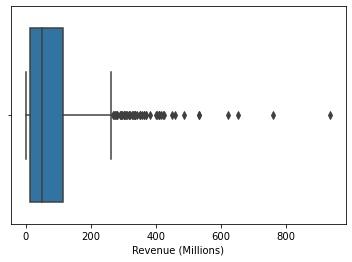

In [ ]:
sns.boxplot(x=data['Revenue (Millions)'])

В переменной дохода нижняя граница значений равно 0, а верхняя - примерно 250, и выбросы (аномальные значения) есть после верхней границы, их значения составляют от 250 до примерно 950. По этой причине, за счёт аномальных значений, которые перетягивали среднее арифметическое вправо, среднее арифметическое и было такое большое по сравнению с медианой.

#### Интерквартильный размах и среднеквадратичное отклонение


Рассмотрим выбросы по переменной дохода с помощью интерквартильного размаха.

In [ ]:
q1 = np.percentile(data[data['Revenue (Millions)'].isnull() == False]['Revenue (Millions)'], 25)
q3 = np.percentile(data[data['Revenue (Millions)'].isnull() == False]['Revenue (Millions)'], 75)
iqr = q3 - q1
bottom_line = q1 - 1.5*iqr
upper_line =  q3 + 1.5*iqr
bottom_line, upper_line

(-137.3975, 264.38250000000005)

Как показал ящик с усами за нижней границей выбросов у нас нет (переменная bottom_line является отрицательной)

In [ ]:
data[data['Revenue (Millions)'] > upper_line].shape

(55, 13)

За верхней границей выбросы есть, их количество 55.

Рассмотрим выбросы по переменной дохода с помощью среднеквадратичного отклонения от среднего.

In [ ]:
mean = data['Revenue (Millions)'].mean()
std = data['Revenue (Millions)'].std(ddof = 0)
bottomline = mean - 2.5*std
upperline = mean + 2.5*std
print(bottomline, upperline)

-175.02942005203823 340.94217234561614


Переменная нижней границы опять отрицательная, значит, выбросов нет.

In [ ]:
data[data['Revenue (Millions)'] > upperline].shape

(27, 13)

Отличия подсчетов с интерквартильным размахом и среднеквадратичным отклонением видны при работе с верхней границей. За счёт того, что она передвинулась вправо (не 264,38 а примерно 341), выбросов стало меньше (не 55, а 27).

Таким образом, можно сказать, что среднеквадратичное отклонение "уточняет" границы, делает их чётче, за счёт этого выбросов может стать меньше.

#### Удаление выбросов

В рамках эксперимента попробуем удалить выбросы по переменной дохода и посмотреть на результаты мцт. Для этого создадим новый датасет, в котором не будет значений выбросов.

In [ ]:
new_data=data[data['Revenue (Millions)'] < upper_line]

In [ ]:
new_data['Revenue (Millions)'].mean()

63.029045287637686

In [ ]:
new_data['Revenue (Millions)'].median()

43.0

In [ ]:
new_data['Revenue (Millions)'].mode()

0    0.03
dtype: float64

Удаление выбросов не привела к улучшению результатов МЦТ, они так же отличаются друг от друга, но среднее арифметическое стало меньше, как раз таки из-за удаления выбросов, которые делали его больше.

### Продолжительность фильма

<AxesSubplot:xlabel='Runtime (Minutes)'>

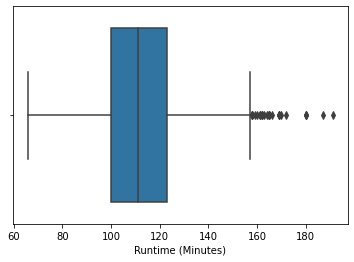

In [ ]:
sns.boxplot(x = data['Runtime (Minutes)'])

Ящик с усами показал, что нижняя граница пролегает примерно у значения 65 минут, а верхняя - чуть меньше 160, при этом большинство значений находятся в области от 100 до 120 минут. Выбросы находятся за верхней границей, от 160 и до более 180 минут.

#### Интерквартильный размах и среднеквадратичное отклонение

Рассмотрим выбросы по переменной продолжительности с помощью интерквартильного размаха

In [ ]:
q1 = np.percentile(data[data['Runtime (Minutes)'].isnull() == False]['Runtime (Minutes)'], 25)
q3 = np.percentile(data[data['Runtime (Minutes)'].isnull() == False]['Runtime (Minutes)'], 75)
iqr = q3 - q1
bottom_line_1 = q1 - 1.5*iqr
upper_line_1 =  q3 + 1.5*iqr
bottom_line_1, upper_line_1

(65.5, 157.5)

In [ ]:
data[data['Runtime (Minutes)'] < bottom_line_1].shape[0]

0

Как и показал ящик с усами, за нижней границей выбросов нет.

In [ ]:
data[data['Runtime (Minutes)'] > upper_line_1].shape[0]

30

Выбросов за верхней границей 30.

Рассмотрим выбросы по переменной продолжительности с помощью среднеквадратичного отклонения

In [ ]:
mean = data['Runtime (Minutes)'].mean()
std = data['Runtime (Minutes)'].std(ddof = 0)
bottomline1 = mean - 2.5*std
upperline1 = mean + 2.5*std
print(bottomline1, upperline1)

66.1682490858442 160.1757509141558


In [ ]:
data[data['Runtime (Minutes)'] < bottomline1]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_scale,Runtime_scale
793,794,Ma vie de Courgette,"Animation,Comedy,Drama","After losing his mother, a young boy is sent t...",Claude Barras,"Gaspard Schlatter, Sixtine Murat, Paulin Jacco...",2016,66,7.8,4370,0.29,85.0,Высокая оценка,Слишком короткий


Интересно, что за нижней границей появился один выброс, и он равен 66 минутам, хотя при расчете с размахом это значение не являлось выбросом.

In [ ]:
data[data['Runtime (Minutes)'] > upperline1].shape[0]

24

Выбросов стало 24, это меньше, чем при расчёте выбросов с размахом (30)

#### Замена выбросов

Попробуем заменить выбросы по интерквартильному размаху, используя медиану. Создадим для этого новую переменную.

In [ ]:
data['Runtime_median'] = data['Runtime (Minutes)'].apply(lambda value: data['Runtime (Minutes)'].median() if value > upper_line_1 else int(value))

In [ ]:
data['Runtime_median'].mean()

111.497

In [ ]:
data['Runtime_median'].median()

111.0

In [ ]:
data['Runtime_median'].mode()

0    111.0
dtype: float64

Замена выбросов привела к тому, что показатели трех мцт стали одинаковыми.

## Пропущенные значения

In [ ]:
data.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
rating_scale            0
Revenue_median        128
dtype: int64

У нас есть 128 пропущенных значений в переменной дохода, а также 64 значения в переменной оценки критиков. Проблема не слишком серьезная, так как пропусков не так много, тем более, что они не мешают решению нашей исследовательской задачи. Можно заменить пропущенные значения на среднее арифметическое или медиану в переменной дохода, а в переменной оценки критиков можно как вставить одну из мцт, так и вставить случайное значение, используя модуль random.  

# Этап 3

## Корреляция

Раннее мы исследовали зависимость оценки зрителей от оценки критиков и дохода. Рассмотрим корреляцию между этими переменными.

In [ ]:
data['Metascore'].corr(data['Rating'])

0.6318965100387073

Интересно посмотреть на график рассеяния

<AxesSubplot:xlabel='Metascore', ylabel='Rating'>

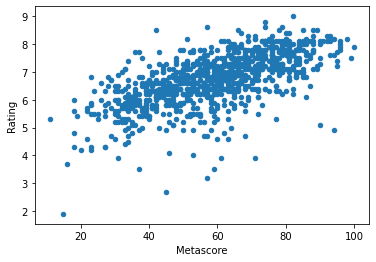

In [ ]:
data.plot('Metascore', 'Rating', kind = 'scatter')

Действительно, связь умеренная (есть некое выстраивание в линию) и положительная (идёт слева направо).

При изучении описательных статистик и мцт мы предрасположили, что оценка критиков и зрителей взаимосвязаны: и критики, и зрители в более менее равной степени ставят оценки. Корреляция показала, что между этими переменными действительно заметная связь (коэффициент равен примерно 0.63), она положительная(чем больше оценка критиков, тем больше и оценка зрителей) и линейная.

Раннее мы сомневались, зависит ли оценка зрителей от дохода фильмов, так как фильмы с маленьким доходом получали хорошие оценки.

In [ ]:
data['Revenue (Millions)'].corr(data['Rating'])

0.21765389419105993

Наши сомнения оправдались. Связь между переменными слабая (коэффициент равен примерно 0.22), при этом она положительная.

Если оценка зрителей зависит от оценки критиков, имеет смысл посмотреть, а от чего зависит оценка критиков?

In [ ]:
data['Revenue (Millions)'].corr(data['Metascore'])

0.1423968811831741

In [ ]:
round(data['Runtime (Minutes)'].corr(data['Metascore']), 2)

0.21

Коэффициенты корреляции между оценкой критиков и доходом, а также между продолжительностью и оценкой слабые, положительные. Делаем вывод, что оценка критиков не зависит от этих факторов.  

## Регрессия

**Целевая переменная и влияющие факторы**

В качестве целевой переменной возьмём оценку зрителей. Как нам показалось, из предложенных в датасете признаков важным влияющим фактором можно выделить продолжительность фильма. Доход, скорее всего, наоборот, зависит от оценки зрителей, количество голосов - вспомогательный признак (по нему как раз оценку зрителей и высчитывали), а оценка критиков кажется нам недостаточным влияющим фактором, ведь зрители не часто обращают на нее внимания при выставлении собственной оценки, а аппелируют своими впечатлениями (к тому же в ходе анализа мы лишь заметили, что обе оценки часто совпадают). Как раз продолжительность фильма может на это повлиять (когда мы ранжировали эту переменную, мы говорили, например, о комфортной продолжительности фильма, ведь слишком длинный или слишком короткий фильм может не понравиться зрителям).  

**Интуиция зависимости и гипотезы**

Говоря о зависимости между продолжительностью фильма и оценкой зрителей, мы предполагаем, что зависимость будет отрицательной и довольно сильной: чем меньше фильм, тем большую оценку он получит. При этом мы выдвинем 3 гипотезы.

**H0**: оценка зрителей не зависит от продолжительности фильма. (нулевую гипотезу всегда выдвигают отрицающей всякую зависимость)

**H1**: оценка зрителей находится в сильной отрицательной зависимости от продолжительности фильма.

**H2**: оценка зрителей находится в слабой или умеренной положительной зависимости от продолжительности фильма. Здесь мы вспоминаем наше понятие "комфортной продолжительности" (выше).

**Уравнение регрессии**

Y = a*X + b

In [ ]:
X = data['Runtime (Minutes)']
Y = data['Rating']

In [ ]:
results = scipy.stats.linregress(X, Y)
results.slope, results.intercept

(0.01971253253102289, 4.492293268399077)

Мы нашли коэффциент при Х (a, slope) и значение, при котором X=0 (b, intercept). Наше уравнение регрессии выглядит так:

Y = 0.01971253253102289*X + 4.492293268399077

Предположим, что продолжительность фильма равна 165 минут. Посчитаем предполагаемую оценку зрителей.

In [ ]:
y = 0.01971253253102289*165 + 4.492293268399077
print(y)

7.744861136017854


Мы видим, что при длине фильма в 165 минут, прогнозируемая оценка зрителей высокая, примерно равна 7.7.

А теперь сделаем наоборот. Возьмем хорошую оценку, например, 5.7 и посчитаем продолжительность фильма по уравнению.

In [ ]:
x = (5.7-4.492293268399077)/0.01971253253102289
print(x)

61.26593473975384


Мы видим, что при оценке в 5.7, прогнозируемая продолжительность фильма равна 61.2 минуты примерно. Замечаем зависимость: больше оценка, больше и продолжительность фильма. Это в какой-то степени опровергает 1 гипотезу.

Построим линейную регрессию

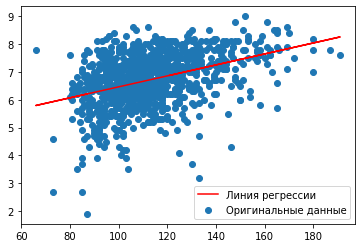

In [ ]:
plt.scatter(X,Y, label = 'Оригинальные данные')
plt.plot(X, results.slope*X + results.intercept, 'r', label = 'Линия регрессии')
plt.legend()
plt.show()

Судя по таблице рассеяния, наши переменные действительно находятся в зависимости (нулевая гипотеза опровергается). Однако связь между переменными средняя и положительная (опровергается гипотеза 1). Мы видим, что значения распределены в интервале от 80 до 130 примерно. Подтверждается 2 гипотеза: оценка зрителей находится в слабой или умеренной положительной зависимости от продолжительности фильма.

## Визуализация

/Users/mcndrw/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


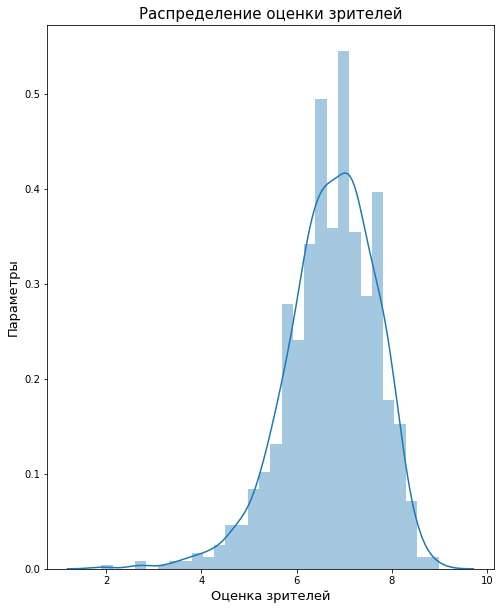

In [ ]:
fig, ax = plt.subplots(figsize=[8,10])
sns.distplot(data['Rating'])
ax.set_title('Распределение оценки зрителей', fontsize = 15)
ax.set_ylabel('Параметры', fontsize=13)
ax.set_xlabel('Оценка зрителей', fontsize=13)
plt.show()

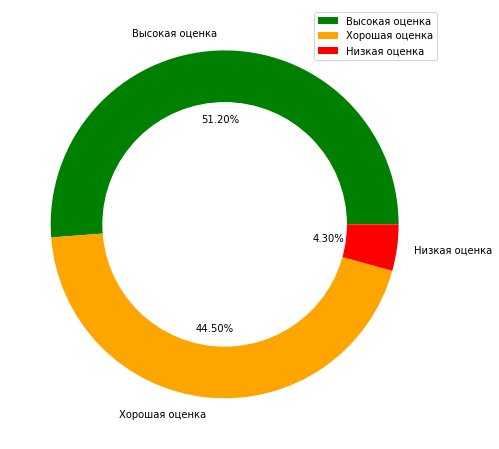

In [ ]:
names = data['Rating_scale'].unique()
fig, ax = plt.subplots(figsize=[12,8])
ax.pie(data['Rating_scale'].value_counts(), autopct='%.2f%%', labels = names, colors=['green','orange','red'])
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax.legend()
plt.show()

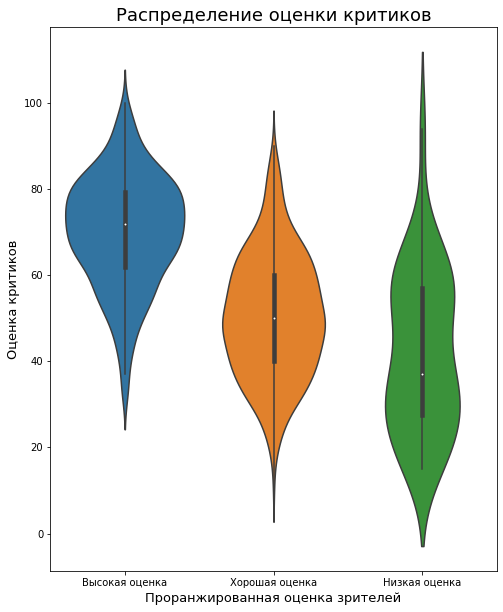

In [ ]:
fig, ax = plt.subplots(figsize=[8,10])
sns.violinplot(x=data['Rating_scale'], y=data['Metascore'])
ax.set_title('Распределение оценки критиков', fontsize = 18)
ax.set_ylabel('Оценка критиков', fontsize=13)
ax.set_xlabel('Проранжированная оценка зрителей', fontsize=13)
plt.show()

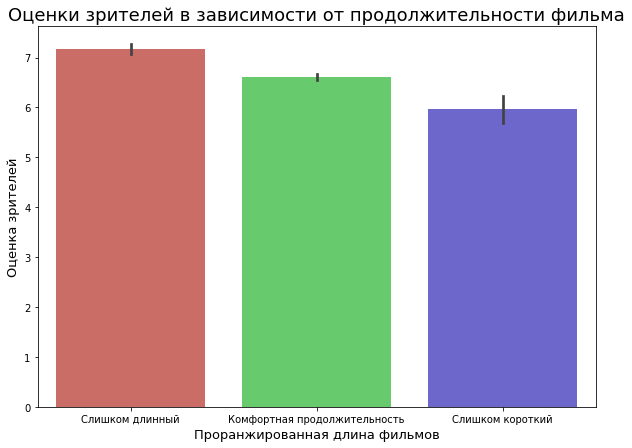

In [ ]:
fig, ax = plt.subplots(figsize=[10,7])
sns.barplot(x=data['Runtime_scale'], y=data['Rating'], palette='hls')
ax.set_title('Оценки зрителей в зависимости от продолжительности фильма', fontsize = 18)
ax.set_ylabel('Оценка зрителей', fontsize=13)
ax.set_xlabel('Проранжированная длина фильмов', fontsize=13)
plt.show()

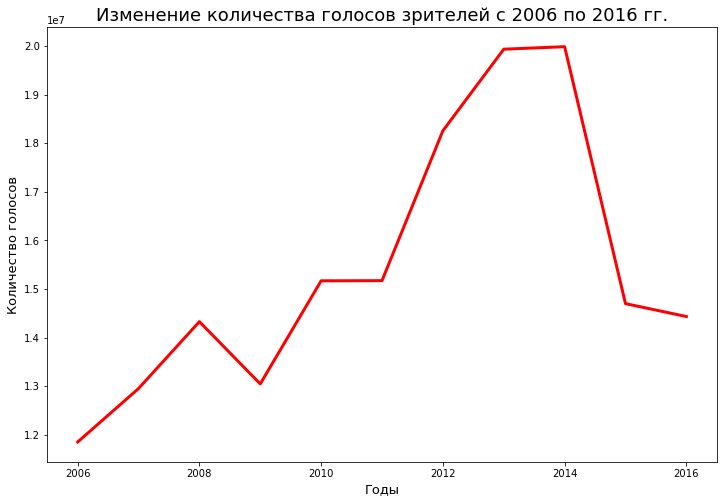

In [ ]:
fig, ax = plt.subplots(figsize=[12,8])
ax.plot(data.groupby('Year')['Votes'].sum(), 'r', linewidth = 3)
ax.set_title('Изменение количества голосов зрителей с 2006 по 2016 гг.', fontsize = 18)
ax.set_ylabel('Количество голосов', fontsize=13)
ax.set_xlabel('Годы', fontsize=13)
plt.show()

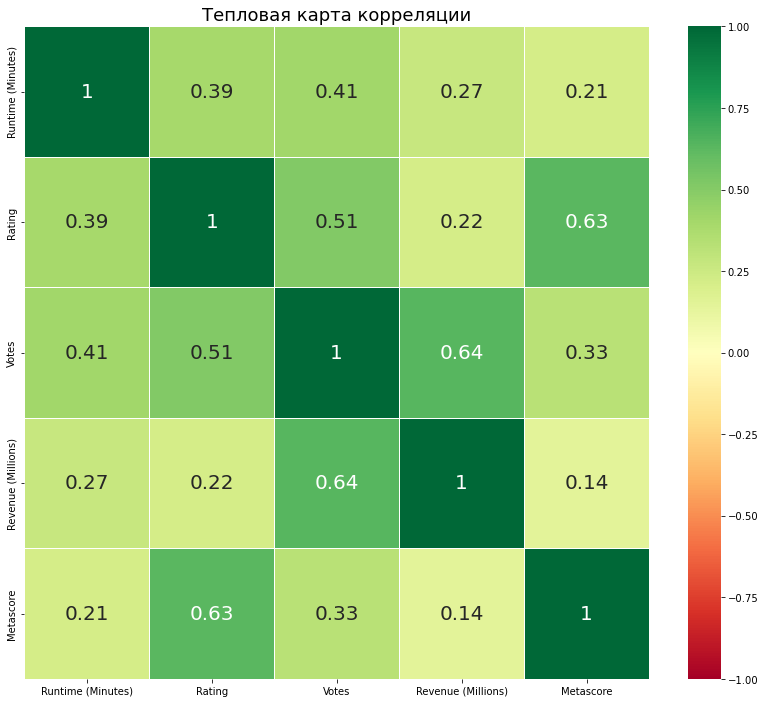

In [ ]:
correlation = data[['Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']].corr()
fig, ax = plt.subplots(figsize=[14,12])
ax.set_title('Тепловая карта корреляции', fontsize=18)
sns.heatmap(correlation, annot = True, linecolor = 'white', linewidth = 0.5, annot_kws = {'size': 20}, cmap = 'RdYlGn', vmin=-1, vmax = 1)
plt.show()

Линейную регрессию и наблюдения мы построили выше